In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

# Personal python module for masks and profiles (available on github)
import gilphot as gp

In [2]:
# Simple function for loading in human-readable profile from pyraf's ellipse
# Might be worth adding into gilphot.py
#
def load_profile( filename, pix_size = 2.5 ):
    
    radius = []
    SB = []
    SB_err = []
    elip = []
    npix = []
    
    f = open( filename, 'r' )
    
    for line in f:
        
        if line.startswith( "#" ):
            continue
            
        radius.append( float( line.split()[0] ) * pix_size )
        SB.append( float( line.split()[1] ) )
        SB_err.append( float( line.split()[2] ) )
        elip.append( float( line.split()[5] ) )
        npix.append( int( line.split()[24] ) )
        
    f.close()
    
    return radius, SB, SB_err, elip, npix


## Azimuthally averaged profiles restricted to quadrants

Quadrants are aligned with galaxy's major and minor axes

In [3]:
# Photometric zeropoints
zerop_r = 27.032
zerop_g = 27.299

# Galactic extinction (Schlafly et al. 2011; accessed via NED)
extinct_g = 0.051
extinct_r = 0.035

# Sky measurements, random errors, and systematic errors by quadrant
# Quadrant 0: North; Quadrant 1: East; etc.
sky_r0 = -1.537 
sky_r0_err = 0.023
sky_r0_err_sys = 0.601 

sky_r1 = -1.381 
sky_r1_err = 0.011
sky_r1_err_sys = 0.184  

sky_r2 = -1.060
sky_r2_err = 0.019
sky_r2_err_sys = 0.275 

sky_r3 = -1.522
sky_r3_err = 0.106
sky_r3_err_sys = 0.18

sky_g0 = -1.254
sky_g0_err = 0.020
sky_g0_err_sys = 0.348 

sky_g1 = -1.171
sky_g1_err = 0.009
sky_g1_err_sys = 0.079  

sky_g2 = -0.973
sky_g2_err = 0.017
sky_g2_err_sys = 0.251 

sky_g3 = -1.417
sky_g3_err = 0.087
sky_g3_err_sys = 0.296

In [4]:
# Loading in r-band quadrant profiles
iraf_file_0 = "/home/cgilhuly/Workspace/Images/NGC4565_cutout_mask_sector0_combined.prof" 
iraf_file_1 = "/home/cgilhuly/Workspace/Images/NGC4565_cutout_mask_sector1_combined.prof" 
iraf_file_2 = "/home/cgilhuly/Workspace/Images/NGC4565_cutout_mask_sector2_combined.prof" 
iraf_file_3 = "/home/cgilhuly/Workspace/Images/NGC4565_cutout_mask_sector3_combined.prof"

rad_r0, SB_r0, SB_err_r0, elip_r0, npix_r0 = load_profile( iraf_file_0 )
rad_r1, SB_r1, SB_err_r1, elip_r1, npix_r1 = load_profile( iraf_file_1 )
rad_r2, SB_r2, SB_err_r2, elip_r2, npix_r2 = load_profile( iraf_file_2 )
rad_r3, SB_r3, SB_err_r3, elip_r3, npix_r3 = load_profile( iraf_file_3 )

SB_mag_r0 = -2.5*np.log10( np.array(SB_r0) - sky_r0 ) + zerop_r + 5*np.log10(2.5)
SB_mag_r1 = -2.5*np.log10( np.array(SB_r1) - sky_r1 ) + zerop_r + 5*np.log10(2.5)
SB_mag_r2 = -2.5*np.log10( np.array(SB_r2) - sky_r2 ) + zerop_r + 5*np.log10(2.5)
SB_mag_r3 = -2.5*np.log10( np.array(SB_r3) - sky_r3 ) + zerop_r + 5*np.log10(2.5)

# Finding all unique radii represented in the four quadrant profiles
rad_all_r = list( set(rad_r0 + rad_r1 + rad_r2 + rad_r3) )
rad_all_r.sort()

/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':
/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  
/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


In [5]:
# Loading in all g-band quadrant profiles
iraf_file_0 = "/home/cgilhuly/Workspace/Images/NGC4565_cutout_mask_sector0_combined_g.prof" 
iraf_file_1 = "/home/cgilhuly/Workspace/Images/NGC4565_cutout_mask_sector1_combined_g.prof" 
iraf_file_2 = "/home/cgilhuly/Workspace/Images/NGC4565_cutout_mask_sector2_combined_g.prof" 
iraf_file_3 = "/home/cgilhuly/Workspace/Images/NGC4565_cutout_mask_sector3_combined_g.prof"

rad_g0, SB_g0, SB_err_g0, elip_g0, npix_g0 = load_profile( iraf_file_0 )
rad_g1, SB_g1, SB_err_g1, elip_g1, npix_g1 = load_profile( iraf_file_1 )
rad_g2, SB_g2, SB_err_g2, elip_g2, npix_g2 = load_profile( iraf_file_2 )
rad_g3, SB_g3, SB_err_g3, elip_g3, npix_g3 = load_profile( iraf_file_3 )

SB_mag_g0 = -2.5*np.log10( np.array(SB_g0) - sky_g0 ) + zerop_g + 5*np.log10(2.5)
SB_mag_g1 = -2.5*np.log10( np.array(SB_g1) - sky_g1 ) + zerop_g + 5*np.log10(2.5)
SB_mag_g2 = -2.5*np.log10( np.array(SB_g2) - sky_g2 ) + zerop_g + 5*np.log10(2.5)
SB_mag_g3 = -2.5*np.log10( np.array(SB_g3) - sky_g3 ) + zerop_g + 5*np.log10(2.5)

# Finding all unique radii represented in the four quadrant profiles
rad_all_g = list( set(rad_g0 + rad_g1 + rad_g2 + rad_g3) )
rad_all_g.sort()

/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':
/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  


## Combining quadrant profiles

Each radial surface brightness profile, with its own corresponding sky value, is averaged to obtain a combined profile. Profiles are weighted at each radius according to the number of unmasked pixels contributing to that surface brightness measurement.

In [6]:
SB_mag_all_r = []
SB_err_all_r_p = []
SB_err_all_r_m = []
SB_err_all_r_ps = []
SB_err_all_r_ms = []

for r in rad_all_r:

    temp_flux = 0
    temp_npix = 0
    temp_err = 0
    temp_err_sys = 0
    count = 0
    
    # Find matching entries in rad_i
    # For matches, increase flux, npix, random error, and random+sys error
    if r in rad_r0:
        i = rad_r0.index(r)
        temp_flux += (SB_r0[i] - sky_r0)*npix_r0[i]
        temp_npix += npix_r0[i]
        temp_err += npix_r0[i]**2 *(SB_err_r0[i]**2 + sky_r0_err**2 )
        temp_err_sys += npix_r0[i]**2 *(SB_err_r0[i]**2 + sky_r0_err**2 + sky_r0_err_sys**2)
        count += 1
        
    if r in rad_r1:
        i = rad_r1.index(r)
        temp_flux += (SB_r1[i] - sky_r1)*npix_r1[i]
        temp_npix += npix_r1[i] 
        temp_err += npix_r1[i]**2 *(SB_err_r1[i]**2  + sky_r1_err**2)
        temp_err_sys += npix_r1[i]**2 *(SB_err_r1[i]**2 + sky_r1_err**2  + sky_r1_err_sys**2)        
        count += 1

    if r in rad_r2:
        i = rad_r2.index(r)
        temp_flux += (SB_r2[i] - sky_r2)*npix_r2[i]
        temp_npix += npix_r2[i]
        temp_err += npix_r2[i]**2 *(SB_err_r2[i]**2  + sky_r2_err**2)
        temp_err_sys += npix_r2[i]**2 *(SB_err_r2[i]**2 + sky_r2_err**2  + sky_r2_err_sys**2)
        count += 1

    if r in rad_r3:
        i = rad_r3.index(r)
        temp_flux += (SB_r3[i] - sky_r3)*npix_r3[i]
        temp_npix += npix_r3[i] 
        temp_err += npix_r3[i]**2 *(SB_err_r3[i]**2  + sky_r3_err**2)  
        temp_err_sys += npix_r3[i]**2 *(SB_err_r3[i]**2 + sky_r3_err**2  + sky_r3_err_sys**2)        
        count += 1        
    
    # If at least one quadrant profile has SB measurement at current radius
    if temp_flux > 0:
        temp_flux = temp_flux / (temp_npix) # Renormalizing weighted SB 
        temp_SB = -2.5*np.log10( temp_flux ) + zerop_r + 5*np.log10(2.5)
        SB_mag_all_r.append(temp_SB)
        
        temp_err = np.sqrt( temp_err ) / ( temp_npix )
        temp_err_sys = np.sqrt( temp_err_sys ) / ( temp_npix )
        
        # Upper and lower error bars (without and with systematic uncertainty in sky)
        SB_err_all_r_m.append( -2.5*np.log10( temp_flux - temp_err ) + zerop_r + 5*np.log10(2.5) )
        SB_err_all_r_p.append( -2.5*np.log10( temp_flux + temp_err ) + zerop_r + 5*np.log10(2.5) )
        SB_err_all_r_ms.append( -2.5*np.log10( temp_flux - temp_err_sys ) + zerop_r + 5*np.log10(2.5) )
        SB_err_all_r_ps.append( -2.5*np.log10( temp_flux + temp_err_sys ) + zerop_r + 5*np.log10(2.5) )
   
    # If no quadrant profiles have SB measurement at current radius, set SB and all errors to NaN
    else:
        SB_mag_all_r.append(np.nan)
        SB_err_all_r_p.append(np.nan)
        SB_err_all_r_m.append(np.nan)
        SB_err_all_r_ps.append(np.nan)
        SB_err_all_r_ms.append(np.nan)

err_all_tmp = [np.array(SB_mag_all_r) - np.array(SB_err_all_r_p), np.array(SB_err_all_r_m) - np.array(SB_mag_all_r) ]
err_all_r = np.array( err_all_tmp )


/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in log10
/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in log10


In [7]:
SB_mag_all_g = []
SB_err_all_g_p = []
SB_err_all_g_m = []
SB_err_all_g_ps = []
SB_err_all_g_ms = []

for r in rad_all_g:

    temp_flux = 0
    temp_npix = 0
    temp_err = 0
    temp_err_sys = 0
    count = 0
    
    # Find matching entries in rad_i
    if r in rad_g0:
        i = rad_g0.index(r)
        temp_flux += (SB_g0[i] - sky_g0)*npix_g0[i]
        temp_npix += npix_g0[i]
        temp_err += npix_g0[i]**2 *(SB_err_g0[i]**2 + sky_g0_err**2 )
        temp_err_sys += npix_g0[i]**2 *(SB_err_g0[i]**2 + sky_g0_err**2 + sky_g0_err_sys**2)
        count += 1
        
    if r in rad_g1:
        i = rad_g1.index(r)
        temp_flux += (SB_g1[i] - sky_g1)*npix_g1[i]
        temp_npix += npix_g1[i] 
        temp_err += npix_g1[i]**2 *(SB_err_g1[i]**2  + sky_g1_err**2)
        temp_err_sys += npix_g1[i]**2 *(SB_err_g1[i]**2 + sky_g1_err**2  + sky_g1_err_sys**2)        
        count += 1

    if r in rad_g2:
        i = rad_g2.index(r)
        temp_flux += (SB_g2[i] - sky_g2)*npix_g2[i]
        temp_npix += npix_g2[i]
        temp_err += npix_g2[i]**2 *(SB_err_g2[i]**2  + sky_g2_err**2)
        temp_err_sys += npix_g2[i]**2 *(SB_err_g2[i]**2 + sky_g2_err**2  + sky_g2_err_sys**2)
        count += 1

    if r in rad_g3:
        i = rad_g3.index(r)
        temp_flux += (SB_g3[i] - sky_g3)*npix_g3[i]
        temp_npix += npix_g3[i] 
        temp_err += npix_g3[i]**2 *(SB_err_g3[i]**2  + sky_g3_err**2)  
        temp_err_sys += npix_g3[i]**2 *(SB_err_g3[i]**2 + sky_g3_err**2  + sky_g3_err_sys**2)        
        count += 1        
    
    if temp_flux > 0:
        temp_flux = temp_flux / (temp_npix) # Renormalizing weighted SB 
        temp_SB = -2.5*np.log10( temp_flux ) + zerop_g + 5*np.log10(2.5)
        SB_mag_all_g.append(temp_SB)
        
        temp_err = np.sqrt( temp_err ) / ( temp_npix )
        temp_err_sys = np.sqrt( temp_err_sys ) / ( temp_npix )
        
        SB_err_all_g_m.append( -2.5*np.log10( temp_flux - temp_err ) + zerop_g + 5*np.log10(2.5) )
        SB_err_all_g_p.append( -2.5*np.log10( temp_flux + temp_err ) + zerop_g + 5*np.log10(2.5) )
        SB_err_all_g_ms.append( -2.5*np.log10( temp_flux - temp_err_sys ) + zerop_g + 5*np.log10(2.5) )
        SB_err_all_g_ps.append( -2.5*np.log10( temp_flux + temp_err_sys ) + zerop_g + 5*np.log10(2.5) )
        
    else:
        SB_mag_all_g.append(np.nan)
        SB_err_all_g_p.append(np.nan)
        SB_err_all_g_m.append(np.nan)
        SB_err_all_g_ps.append(np.nan)
        SB_err_all_g_ms.append(np.nan)

err_all_tmp = [np.array(SB_mag_all_g) - np.array(SB_err_all_g_p), np.array(SB_err_all_g_m) - np.array(SB_mag_all_g) ]
err_all_g = np.array( err_all_tmp )

/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in log10
/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in log10


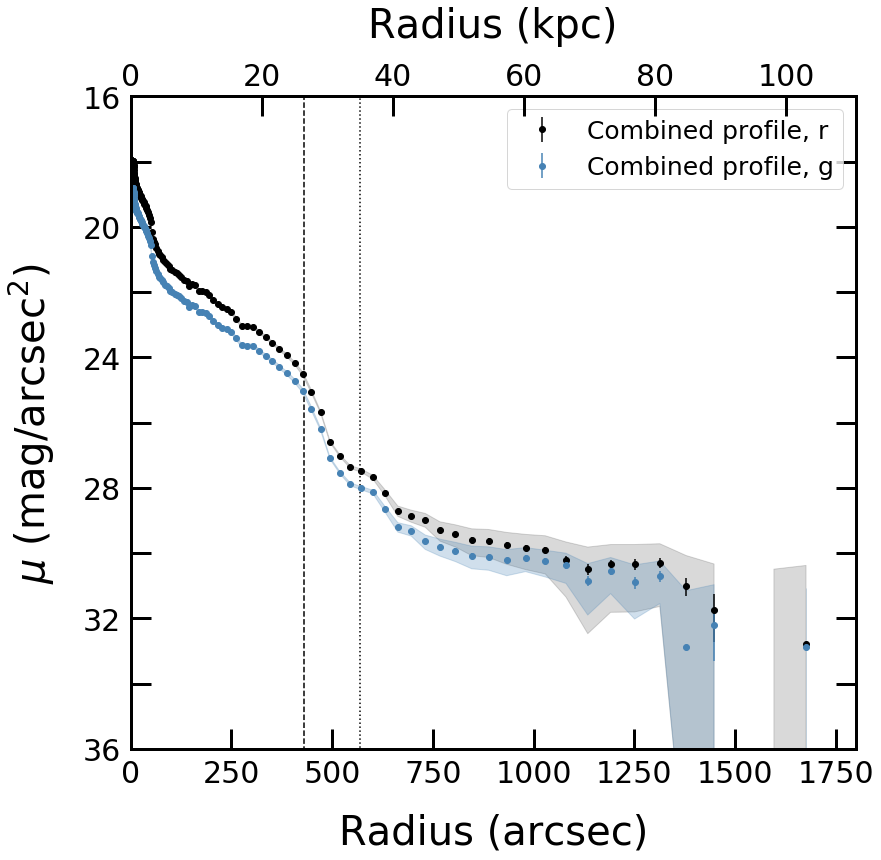

In [8]:
# Setting all NaNs to something large and finite for plotting purposes
SB_err_all_r_ms = [40 if np.isnan(x) else x for x in SB_err_all_r_ms]
SB_err_all_g_ms = [40 if np.isnan(x) else x for x in SB_err_all_g_ms]

SB_err_all_r_m = [40 if np.isnan(x) else x for x in SB_err_all_r_m]
SB_err_all_g_m = [40 if np.isnan(x) else x for x in SB_err_all_g_m]

fig, ax = plt.subplots()

# Plotting combined profiles and their envelopes including systematic sky uncertainty
ax.errorbar(rad_all_r, np.array(SB_mag_all_r) - extinct_r, yerr=err_all_r, fmt='o', c="k", label="Combined profile, r")
ax.errorbar(rad_all_g, np.array(SB_mag_all_g) - extinct_g, yerr=err_all_g, fmt='o', c="steelblue", label="Combined profile, g")
plt.fill_between(rad_all_r, np.array(SB_err_all_r_ps) - extinct_r, np.array(SB_err_all_r_ms) - extinct_r, alpha=0.15, color="k")
plt.fill_between(rad_all_g, np.array(SB_err_all_g_ps) - extinct_g, np.array(SB_err_all_g_ms) - extinct_g, alpha=0.25, color="steelblue")
 
leg = plt.legend(loc=1, prop={'size': 25})

ax.set_ylabel(r"$\mu$ (mag/arcsec$^2$)", size=40, labelpad=25)
ax.set_xlabel(r"Radius (arcsec)", size=40, labelpad=25)
ax.tick_params(labelsize=30)
ax.invert_yaxis()

# Formatting ticks and plot edges 
ax.spines['bottom'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)

ax.xaxis.set_tick_params(which='major',size=20,width=3,pad=10,top=True,right=True)
ax.yaxis.set_tick_params(which='major',size=20,width=3,pad=10,top=True,right=True)
ax.tick_params(axis='both',which='major',direction='in')

# Secondary x axis for physical length scales
ax3 = ax.twiny()
ax3.set_xlim(0,110.67)  # 1800 arcsec at a distance of 12.7 Mpc
ax3.set_xlabel(r"Radius (kpc)", size=40, labelpad=25)
ax3.tick_params(labelsize=30)
ax3.xaxis.set_tick_params(which='major',size=20,width=3,pad=5,top=True,right=True, direction="in")

ax.plot([430, 430],[10,36], 'k--')
ax.plot([570, 570],[10,36], 'k:')

ax.set_xlim(0, 1800)
ax.set_ylim(36, 16)

ax.set_yticks([16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36])
ax.set_yticklabels(["16", "", "20", "", "24", "", "28", "", "32", "", "36" ])

fig.set_size_inches(13, 12)
plt.show()

## Comparison with profiles from individual quadrants

In [9]:
# Upper and lower (random) error bars for each of the r-band quadrant profiles
mag_r0_p, mag_r0_m = gp.calc_profile_error( SB_r0, SB_err_r0, sky_r0, sky_r0_err, zerop_r )
err_r0 = [SB_mag_r0 - mag_r0_p, mag_r0_m - SB_mag_r0]

mag_r1_p, mag_r1_m = gp.calc_profile_error( SB_r1, SB_err_r1, sky_r1, sky_r1_err, zerop_r )
err_r1 = [SB_mag_r1 - mag_r1_p, mag_r1_m - SB_mag_r1]

mag_r2_p, mag_r2_m = gp.calc_profile_error( SB_r2, SB_err_r2, sky_r2, sky_r2_err, zerop_r )
err_r2 = [SB_mag_r2 - mag_r2_p, mag_r2_m - SB_mag_r2]

mag_r3_p, mag_r3_m = gp.calc_profile_error( SB_r3, SB_err_r3, sky_r3, sky_r3_err, zerop_r )
err_r3 = [SB_mag_r3 - mag_r3_p, mag_r3_m - SB_mag_r3]


# Upper and lower (random) error bars for each of the g-band quadrant profiles
mag_g0_p, mag_g0_m = gp.calc_profile_error( SB_g0, SB_err_g0, sky_g0, sky_g0_err, zerop_g )
err_g0 = [SB_mag_g0 - mag_g0_p, mag_g0_m - SB_mag_g0]

mag_g1_p, mag_g1_m = gp.calc_profile_error( SB_g1, SB_err_g1, sky_g1, sky_g1_err, zerop_g )
err_g1 = [SB_mag_g1 - mag_g1_p, mag_g1_m - SB_mag_g1]

mag_g2_p, mag_g2_m = gp.calc_profile_error( SB_g2, SB_err_g2, sky_g2, sky_g2_err, zerop_g )
err_g2 = [SB_mag_g2 - mag_g2_p, mag_g2_m - SB_mag_g2]

mag_g3_p, mag_g3_m = gp.calc_profile_error( SB_g3, SB_err_g3, sky_g3, sky_g3_err, zerop_g )
err_g3 = [SB_mag_g3 - mag_g3_p, mag_g3_m - SB_mag_g3]

/home/cgilhuly/Scripts/gilphot.py:201: RuntimeWarning: invalid value encountered in log10
  ) + 5*np.log10(pix_size)
/home/cgilhuly/Scripts/gilphot.py:205: RuntimeWarning: invalid value encountered in log10
  ) + 5*np.log10(pix_size)


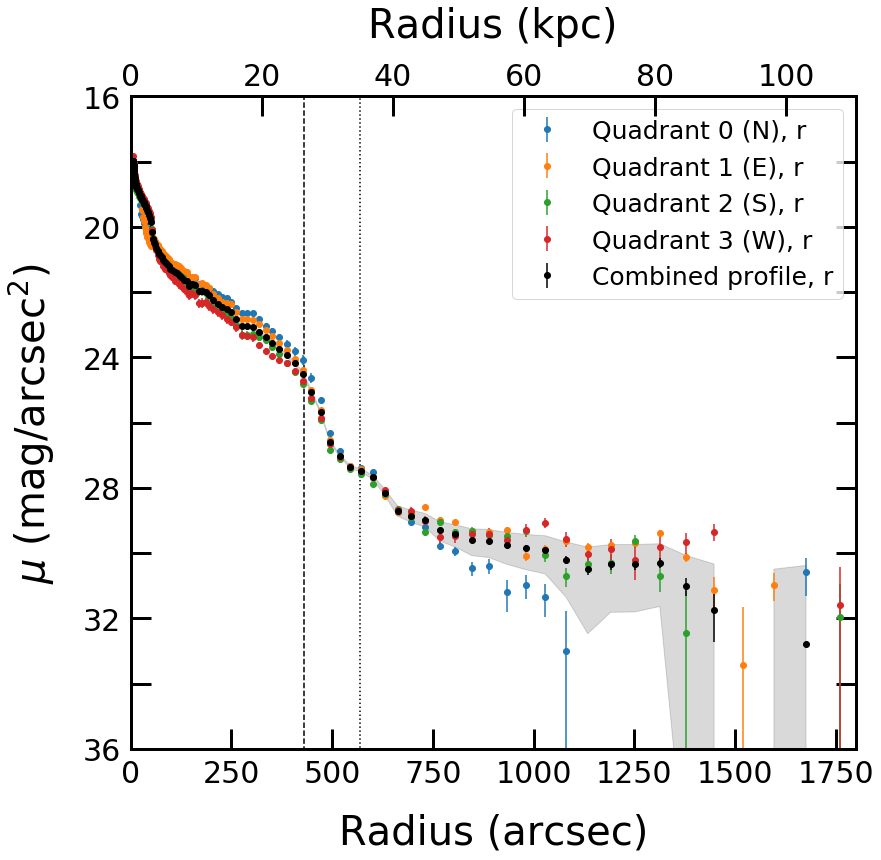

In [10]:
fig, ax = plt.subplots()

# Individual quadrant profiles (with random error)
plt.errorbar( rad_r0, np.array(SB_mag_r0) - extinct_r, yerr=err_r0, fmt='o', label="Quadrant 0 (N), r" )
plt.errorbar( rad_r1, np.array(SB_mag_r1) - extinct_r, yerr=err_r1, fmt='o', label="Quadrant 1 (E), r" )
plt.errorbar( rad_r2, np.array(SB_mag_r2) - extinct_r, yerr=err_r2, fmt='o', label="Quadrant 2 (S), r" )
plt.errorbar( rad_r3, np.array(SB_mag_r3) - extinct_r, yerr=err_r3, fmt='o', label="Quadrant 3 (W), r" )
 
# Combined r-band profile 
ax.errorbar(rad_all_r, np.array(SB_mag_all_r) - extinct_r, yerr=err_all_r, fmt='o', c="k", label="Combined profile, r")
plt.fill_between(rad_all_r, np.array(SB_err_all_r_ps) - extinct_r, np.array(SB_err_all_r_ms) - extinct_r, alpha=0.15, color="k")
 
leg = plt.legend(loc=1, prop={'size': 25})

ax.set_ylabel(r"$\mu$ (mag/arcsec$^2$)", size=40, labelpad=25)
ax.set_xlabel(r"Radius (arcsec)", size=40, labelpad=25)
ax.tick_params(labelsize=30)
ax.invert_yaxis()

# Formatting ticks and plot edges
ax.spines['bottom'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)

ax.xaxis.set_tick_params(which='major',size=20,width=3,pad=10,top=True,right=True)
ax.yaxis.set_tick_params(which='major',size=20,width=3,pad=10,top=True,right=True)
ax.tick_params(axis='both',which='major',direction='in')

# Secondary x axis for physical length scales
ax3 = ax.twiny()
ax3.set_xlim(0,110.67)  # 1800 arcsec at a distance of 12.7 Mpc
ax3.set_xlabel(r"Radius (kpc)", size=40, labelpad=25)
ax3.tick_params(labelsize=30)
ax3.xaxis.set_tick_params(which='major',size=20,width=3,pad=5,top=True,right=True, direction="in")

# Marking radii of interest: NW truncation radius and position of excess (fan)
ax.plot([430, 430],[10,36], 'k--')
ax.plot([570, 570],[10,36], 'k:')

ax.set_xlim(0, 1800)
ax.set_ylim(36, 16)

ax.set_yticks([16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36])
ax.set_yticklabels(["16", "", "20", "", "24", "", "28", "", "32", "", "36" ])

fig.set_size_inches(13, 12)
plt.show()

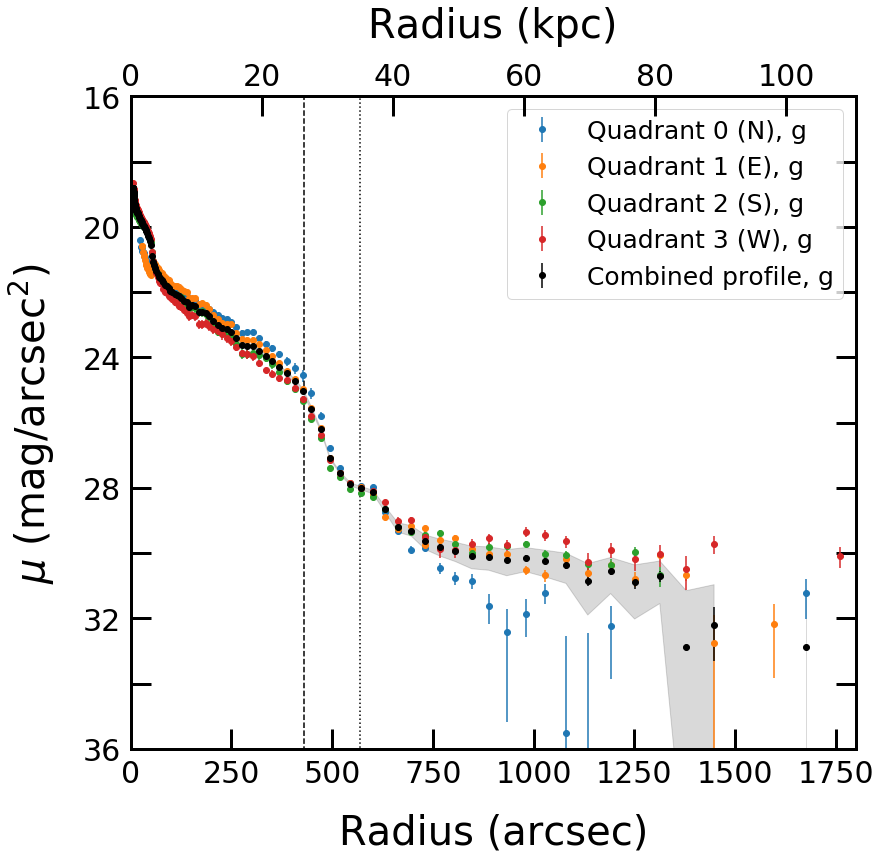

In [11]:
fig, ax = plt.subplots()

# Individual quadrant profiles (with random error)
plt.errorbar( rad_g0, np.array(SB_mag_g0) - extinct_g, yerr=err_g0, fmt='o', label="Quadrant 0 (N), g" )
plt.errorbar( rad_g1, np.array(SB_mag_g1) - extinct_g, yerr=err_g1, fmt='o', label="Quadrant 1 (E), g" )
plt.errorbar( rad_g2, np.array(SB_mag_g2) - extinct_g, yerr=err_g2, fmt='o', label="Quadrant 2 (S), g" )
plt.errorbar( rad_g3, np.array(SB_mag_g3) - extinct_g, yerr=err_g3, fmt='o', label="Quadrant 3 (W), g" )
 
# Combined r-band profile 
ax.errorbar(rad_all_g, np.array(SB_mag_all_g) - extinct_g, yerr=err_all_g, fmt='o', c="k", label="Combined profile, g")
plt.fill_between(rad_all_g, np.array(SB_err_all_g_ps) - extinct_g, np.array(SB_err_all_g_ms) - extinct_g, alpha=0.15, color="k")
 
leg = plt.legend(loc=1, prop={'size': 25})

ax.set_ylabel(r"$\mu$ (mag/arcsec$^2$)", size=40, labelpad=25)
ax.set_xlabel(r"Radius (arcsec)", size=40, labelpad=25)
ax.tick_params(labelsize=30)
ax.invert_yaxis()

# Formatting ticks and plot edges
ax.spines['bottom'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)

ax.xaxis.set_tick_params(which='major',size=20,width=3,pad=10,top=True,right=True)
ax.yaxis.set_tick_params(which='major',size=20,width=3,pad=10,top=True,right=True)
ax.tick_params(axis='both',which='major',direction='in')

# Secondary x axis for physical length scales
ax3 = ax.twiny()
ax3.set_xlim(0,110.67)  # 1800 arcsec at a distance of 12.7 Mpc
ax3.set_xlabel(r"Radius (kpc)", size=40, labelpad=25)
ax3.tick_params(labelsize=30)
ax3.xaxis.set_tick_params(which='major',size=20,width=3,pad=5,top=True,right=True, direction="in")

# Marking radii of interest: NW truncation radius and position of excess (fan)
ax.plot([430, 430],[10,36], 'k--')
ax.plot([570, 570],[10,36], 'k:')

ax.set_xlim(0, 1800)
ax.set_ylim(36, 16)

ax.set_yticks([16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36])
ax.set_yticklabels(["16", "", "20", "", "24", "", "28", "", "32", "", "36" ])

fig.set_size_inches(13, 12)
plt.show()

## Comparison with global, azimuthally averaged profiles extracted using ellipse

In [12]:
rad_r, SB_r, SB_r_err, elip_r, npix_r = load_profile( "/home/cgilhuly/Workspace/Images/NGC4565_r_res_final_ellipse_combined.prof" )
rad_g, SB_g, SB_g_err, elip_g, npix_g = load_profile( "/home/cgilhuly/Workspace/Images/NGC4565_g_res_final_ellipse_combined.prof" )

sky_r = -1.341
sky_r_err = 0.4  # Estimated by max variation from quadrant to quadrant; neglecting random error in sky
                 # This large value was the motivation for combining quadrant profiles

sky_g = -1.146
sky_g_err = 0.3


SB_mag_r = -2.5*np.log10( np.array(SB_r) - sky_r ) + zerop_r + 5*np.log10(2.5)
SB_mag_g = -2.5*np.log10( np.array(SB_g) - sky_g ) + zerop_g + 5*np.log10(2.5)

SB_r_err_p, SB_r_err_m = gp.calc_profile_error( SB_r, SB_r_err, sky_r, sky_err = 0, zeropoint = zerop_r )
SB_r_err_ps, SB_r_err_ms = gp.calc_profile_error( SB_r, SB_r_err, sky_r, sky_r_err, zerop_r )

err_tmp = [SB_mag_r - SB_r_err_p, SB_r_err_m - SB_mag_r ]
err_r = np.array( err_tmp )

SB_g_err_p, SB_g_err_m = gp.calc_profile_error( SB_g, SB_g_err, sky_g, sky_err = 0, zeropoint = zerop_g )
SB_g_err_ps, SB_g_err_ms = gp.calc_profile_error( SB_g, SB_g_err, sky_g, sky_g_err, zerop_g )

err_tmp = [SB_mag_g - SB_g_err_p, SB_g_err_m - SB_mag_g ]
err_g = np.array( err_tmp )

/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':
/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/home/cgilhuly/Scripts/gilphot.py:201: RuntimeWarning: invalid value encountered in log10
  ) + 5*np.log10(pix_size)
/home/cgilhuly/Scripts/gilphot.py:205: RuntimeWarning: invalid value encountered in log10
  ) + 5*np.log10(pix_size)


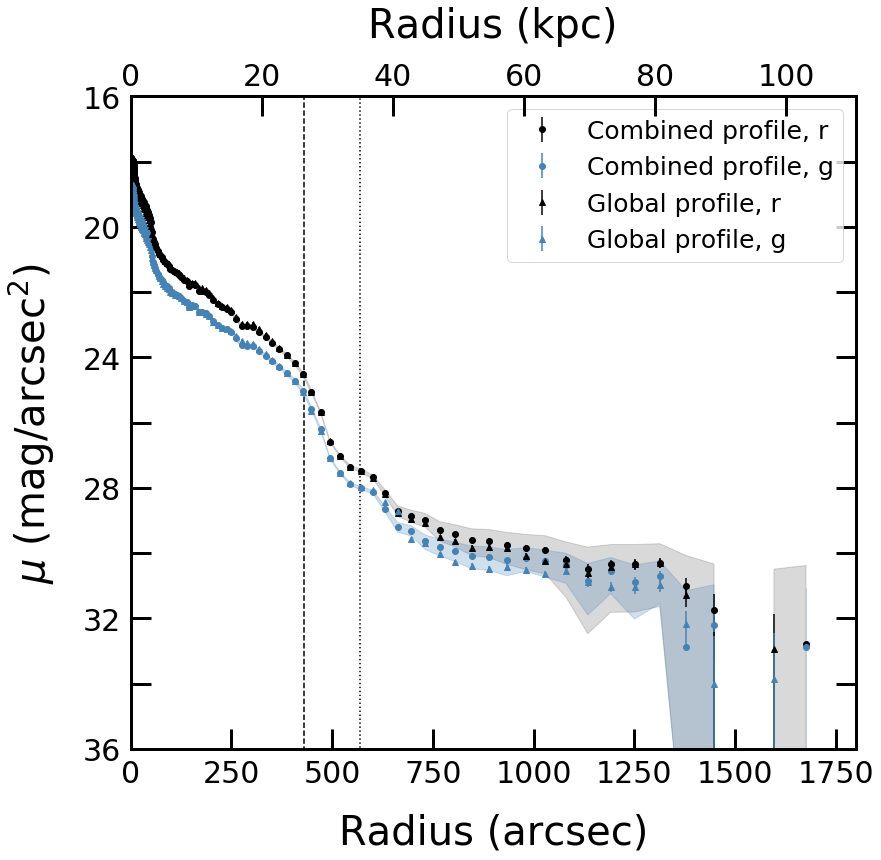

In [13]:
fig, ax = plt.subplots()

# Plotting combined profiles and their envelopes including systematic sky uncertainty
ax.errorbar(rad_all_r, np.array(SB_mag_all_r) - extinct_r, yerr=err_all_r, fmt='o', c="k", label="Combined profile, r")
ax.errorbar(rad_all_g, np.array(SB_mag_all_g) - extinct_g, yerr=err_all_g, fmt='o', c="steelblue", label="Combined profile, g")
plt.fill_between(rad_all_r, np.array(SB_err_all_r_ps) - extinct_r, np.array(SB_err_all_r_ms) - extinct_r, alpha=0.15, color="k")
plt.fill_between(rad_all_g, np.array(SB_err_all_g_ps) - extinct_g, np.array(SB_err_all_g_ms) - extinct_g, alpha=0.25, color="steelblue")
 
# Plotting global profiles (ie. not subdivided into quadrants)    
ax.errorbar( rad_r, np.array(SB_mag_r) - extinct_r, yerr=err_r, fmt='^', c='k', label="Global profile, r")
ax.errorbar( rad_g, np.array(SB_mag_g) - extinct_g, yerr=err_g, fmt='^', c="steelblue", label="Global profile, g")
    
    
leg = plt.legend(loc=1, prop={'size': 25})

ax.set_ylabel(r"$\mu$ (mag/arcsec$^2$)", size=40, labelpad=25)
ax.set_xlabel(r"Radius (arcsec)", size=40, labelpad=25)
ax.tick_params(labelsize=30)
ax.invert_yaxis()

# Formatting ticks and plot edges 
ax.spines['bottom'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)

ax.xaxis.set_tick_params(which='major',size=20,width=3,pad=10,top=True,right=True)
ax.yaxis.set_tick_params(which='major',size=20,width=3,pad=10,top=True,right=True)
ax.tick_params(axis='both',which='major',direction='in')

# Secondary x axis for physical length scales
ax3 = ax.twiny()
ax3.set_xlim(0,110.67)  # 1800 arcsec at a distance of 12.7 Mpc
ax3.set_xlabel(r"Radius (kpc)", size=40, labelpad=25)
ax3.tick_params(labelsize=30)
ax3.xaxis.set_tick_params(which='major',size=20,width=3,pad=5,top=True,right=True, direction="in")

ax.plot([430, 430],[10,36], 'k--')
ax.plot([570, 570],[10,36], 'k:')

ax.set_xlim(0, 1800)
ax.set_ylim(36, 16)

ax.set_yticks([16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36])
ax.set_yticklabels(["16", "", "20", "", "24", "", "28", "", "32", "", "36" ])

fig.set_size_inches(13, 12)
plt.show()